## Importing Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [3]:
data = pd.read_csv("train_loan_app.csv")
data.drop(columns="id",inplace=True)

In [4]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0
58644,31,75000,MORTGAGE,2.0,VENTURE,B,15000,11.11,0.20,N,5,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [7]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [8]:
for i in data.columns:
    if data[i].dtype == object:
        print(data[i].value_counts())
        print("-------------------------------")

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64
-------------------------------
loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64
-------------------------------
loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64
-------------------------------
cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64
-------------------------------


## labelencoding

In [9]:
le = LabelEncoder()
data["cb_person_default_on_file"] = le.fit_transform(data.cb_person_default_on_file)   # N = 0 & Y = 1
data.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,0,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,0,2,0


## Ordinal

In [10]:
order = ["A","B","C","D","E","F","G"]
ord = OrdinalEncoder(categories=[order])
data["loan_grade"] = ord.fit_transform(data[["loan_grade"]])

In [11]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,1.0,6000,11.49,0.17,0,14,0
1,22,56000,OWN,6.0,MEDICAL,2.0,4000,13.35,0.07,0,2,0
2,29,28800,OWN,8.0,PERSONAL,0.0,6000,8.90,0.21,0,10,0
3,30,70000,RENT,14.0,VENTURE,1.0,12000,11.11,0.17,0,5,0
4,22,60000,RENT,2.0,MEDICAL,0.0,6000,6.92,0.10,0,3,0


## one hot

In [12]:
data = pd.get_dummies(data)

In [13]:
data.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,37,35000,0.0,1.0,6000,11.49,0.17,0,14,0,False,False,False,True,False,True,False,False,False,False
1,22,56000,6.0,2.0,4000,13.35,0.07,0,2,0,False,False,True,False,False,False,False,True,False,False
2,29,28800,8.0,0.0,6000,8.90,0.21,0,10,0,False,False,True,False,False,False,False,False,True,False
3,30,70000,14.0,1.0,12000,11.11,0.17,0,5,0,False,False,False,True,False,False,False,False,False,True
4,22,60000,2.0,0.0,6000,6.92,0.10,0,3,0,False,False,False,True,False,False,False,True,False,False


In [14]:
x,y = data.drop(columns="loan_status"),data.loan_status

In [15]:
x.corrwith(y).sort_values()

person_home_ownership_MORTGAGE   -0.202613
person_income                    -0.169956
person_emp_length                -0.100428
person_home_ownership_OWN        -0.087556
loan_intent_VENTURE              -0.064378
loan_intent_EDUCATION            -0.051005
loan_intent_PERSONAL             -0.012461
cb_person_cred_hist_length       -0.003030
person_age                       -0.001130
person_home_ownership_OTHER       0.002918
loan_intent_HOMEIMPROVEMENT       0.031063
loan_intent_MEDICAL               0.049139
loan_intent_DEBTCONSOLIDATION     0.057682
loan_amnt                         0.144982
cb_person_default_on_file         0.186962
person_home_ownership_RENT        0.239620
loan_int_rate                     0.338948
loan_percent_income               0.378280
loan_grade                        0.385908
dtype: float64

In [16]:
data1 = data.copy()

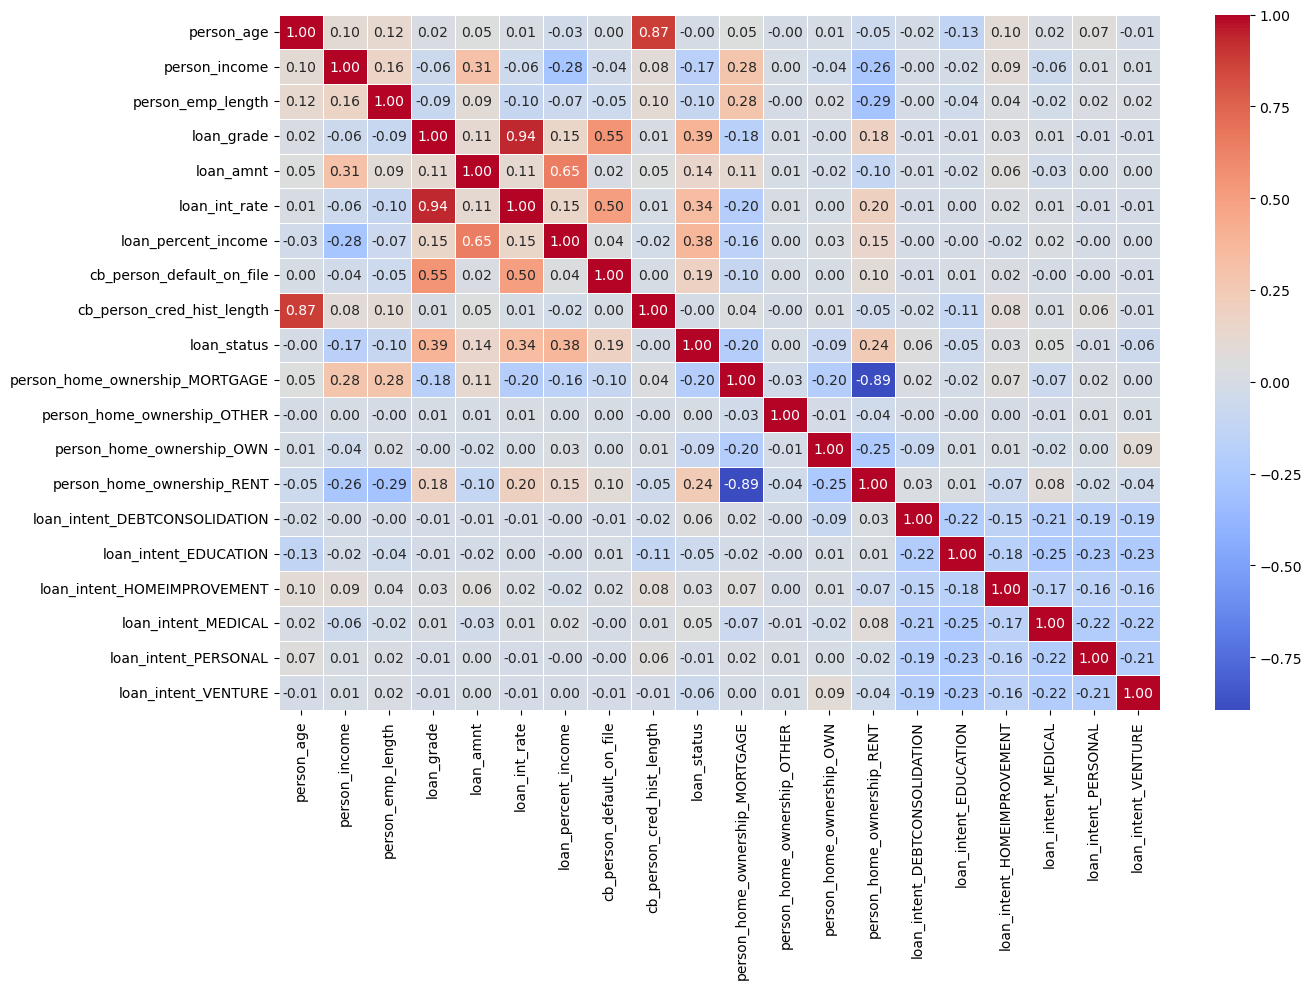

In [17]:
corr = data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f' )
plt.tight_layout()
plt.show()

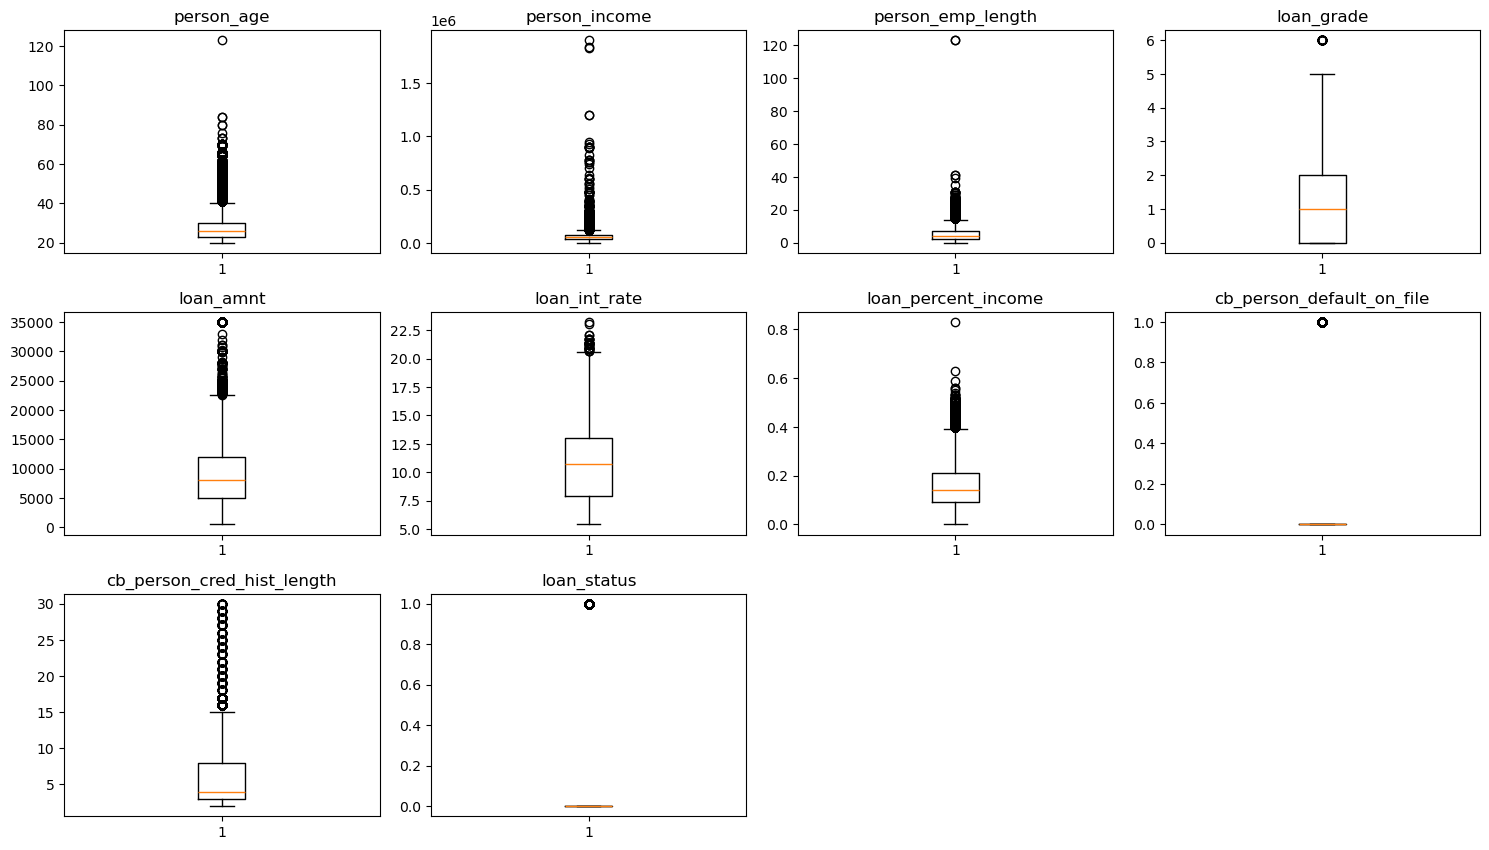

In [18]:
data_num = data.select_dtypes("number")
plt.figure(figsize=(15,14))
for i,j in enumerate(data_num.columns,1):
    plt.subplot(5,4,i)
    plt.boxplot(data_num[j])
    plt.title(j)
    
plt.tight_layout()
plt.show()

## Standardization

In [19]:
std = StandardScaler()
x_std = std.fit_transform(x)
x_std_data = pd.DataFrame(x_std,columns=x.columns)
x_std_data.head(2)

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,1.566200,-0.765768,-1.187200,-0.063697,-0.578306,0.267616,0.117378,-0.417419,2.031798,-0.856727,-0.038986,-0.237768,0.957538,-0.429488,1.944005,-0.346305,-0.478719,-0.453837,-0.4537
1,-0.920057,-0.212128,0.328047,0.892168,-0.937775,0.880532,-0.973242,-0.417419,-0.946489,-0.856727,-0.038986,4.205788,-1.044345,-0.429488,-0.514402,-0.346305,2.088910,-0.453837,-0.4537


## Normalization

In [20]:
norm = MinMaxScaler()
x_norm = norm.fit_transform(x)
x_norm_data = pd.DataFrame(x_norm,columns=x.columns)
x_norm_data.head(2)

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0.165049,0.016246,0.00000,0.166667,0.159420,0.341011,0.204819,0.0,0.428571,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.019417,0.027324,0.04878,0.333333,0.101449,0.445506,0.084337,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## base model

In [21]:
x_trn,x_tst,y_trn,y_tst = train_test_split(x,y,random_state=42,test_size=0.20)

## Random Forest

In [22]:
rfc = RandomForestClassifier()
rfc.fit(x_trn,y_trn)

RandomForestClassifier()

In [23]:
pred = rfc.predict(x_tst)
acc = accuracy_score(y_tst,pred)
acc

0.9531076818143064

## important features

In [23]:
importance = rfc.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importance
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
6,loan_percent_income,0.244723
3,loan_grade,0.139734
5,loan_int_rate,0.121118
1,person_income,0.104220
4,loan_amnt,0.068094
2,person_emp_length,0.061898
12,person_home_ownership_RENT,0.051315
0,person_age,0.045046
8,cb_person_cred_hist_length,0.034991
9,person_home_ownership_MORTGAGE,0.025294


## Removing unwanted features

In [24]:
data1 = data.copy()
data1.drop(columns=["person_home_ownership_OTHER","loan_intent_VENTURE","loan_intent_PERSONAL","loan_intent_EDUCATION","cb_person_default_on_file"],inplace=True)
x1,y1 = data1.drop(columns="loan_status"),data1.loan_status
x_trn1,x_tst1,y_trn1,y_tst1 = train_test_split(x1,y1,random_state=42,test_size=0.20)

In [25]:
rfc1 = RandomForestClassifier()
rfc1.fit(x_trn1,y_trn1)

RandomForestClassifier()

In [26]:
pred1 = rfc1.predict(x_tst1)
acc = accuracy_score(y_tst1,pred1)
acc

0.9528519055332936

## Recursive Feature Elimination (RFE):

In [30]:
rfe = RFE(estimator=rfc, n_features_to_select=10)
rfe.fit(x, y)

ranking = rfe.ranking_

selected_features = rfe.support_

print("Selected features:", x.columns[selected_features])

feature_ranking = pd.DataFrame({
    'Feature': x.columns,
    'Ranking': ranking
}).sort_values(by='Ranking')

print(feature_ranking)

Selected features: Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION'],
      dtype='object')
                           Feature  Ranking
0                       person_age        1
1                    person_income        1
2                person_emp_length        1
3                       loan_grade        1
4                        loan_amnt        1
5                    loan_int_rate        1
6              loan_percent_income        1
8       cb_person_cred_hist_length        1
13   loan_intent_DEBTCONSOLIDATION        1
12      person_home_ownership_RENT        1
16             loan_intent_MEDICAL        2
9   person_home_ownership_MORTGAGE        3
11       person_home_ownership_OWN        4
15     loan_intent_HOMEIMPROVEMENT        5
7        cb_person_default_on_file        6
14           l

In [ ]:
# param_grid = {
#     'n_estimators': [50, 100, 200],        
#     'max_depth': [None, 10, 20, 30],      
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],        
#     'max_features': ['auto', 'sqrt'],    
#     'bootstrap': [True, False]             
# }

# r_search = RandomizedSearchCV(estimator=rfc, 
#                                param_distributions=param_grid, 
#                                cv=5, 
#                                scoring='accuracy', 
#                                verbose=1, 
#                                random_state=42,
#                                n_iter=50)  


# r_search.fit(x_trn, y_trn)


# best_params = r_search.best_params_
# print("Best parameters found: ", best_params)


## XGBoost

In [27]:
xg = XGBClassifier()
xg.fit(x_trn,y_trn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
pred = xg.predict(x_tst)
acc = accuracy_score(y_tst,pred)
acc

0.9524256117316054

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the model
    'max_depth': [3, 4, 5, 6, 7],            # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage
    'subsample': [0.8, 1.0],                  # Fraction of samples to be used for each tree
    'colsample_bytree': [0.8, 1.0],           # Fraction of features to be used for each tree
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xg, 
                           param_grid=param_grid, 
                           scoring='accuracy',  # Metric to optimize
                           cv=5,                # 5-fold cross-validation
                           verbose=1,          # Print progress
                           n_jobs=-1)          # Use all available cores

# Fit the model to the training data
grid_search.fit(x_trn, y_trn)

# Retrieve the best parameters found
best_params = grid_search.best_params_
print("Best parameters found using Grid Search: ", best_params)

In [29]:
xg_grid = XGBClassifier(colsample_bytree=0.8,learning_rate =0.2,max_depth=4,n_estimators = 200,subsample=1.0)
xg_grid.fit(x_trn,y_trn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
pred = xg_grid.predict(x_tst)
acc = accuracy_score(y_tst,pred)
acc

0.9532781993349817

## CatBoost

In [31]:
ct = CatBoostClassifier()
ct.fit(x_trn,y_trn)

Learning rate set to 0.053283
0:	learn: 0.6235216	total: 257ms	remaining: 4m 17s
1:	learn: 0.5638329	total: 289ms	remaining: 2m 24s
2:	learn: 0.5132475	total: 315ms	remaining: 1m 44s
3:	learn: 0.4687080	total: 341ms	remaining: 1m 25s
4:	learn: 0.4302117	total: 368ms	remaining: 1m 13s
5:	learn: 0.3982061	total: 394ms	remaining: 1m 5s
6:	learn: 0.3707988	total: 421ms	remaining: 59.7s
7:	learn: 0.3465533	total: 458ms	remaining: 56.8s
8:	learn: 0.3265575	total: 497ms	remaining: 54.7s
9:	learn: 0.3091832	total: 524ms	remaining: 51.9s
10:	learn: 0.2936671	total: 558ms	remaining: 50.2s
11:	learn: 0.2808444	total: 593ms	remaining: 48.8s
12:	learn: 0.2697897	total: 625ms	remaining: 47.4s
13:	learn: 0.2602096	total: 653ms	remaining: 46s
14:	learn: 0.2520851	total: 680ms	remaining: 44.6s
15:	learn: 0.2440418	total: 708ms	remaining: 43.6s
16:	learn: 0.2373953	total: 729ms	remaining: 42.1s
17:	learn: 0.2314634	total: 750ms	remaining: 40.9s
18:	learn: 0.2262840	total: 776ms	remaining: 40s
19:	learn:

In [32]:
pred = ct.predict(x_tst)
acc = accuracy_score(y_tst,pred)
acc

0.9542160456986956

In [ ]:
param_distributions = {
    'iterations': [100, 200, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0.5, 1.0],
    'random_strength': [1, 2, 5],
    'subsample': [0.8, 1.0]
}

random_search = RandomizedSearchCV(estimator=ct,
                                   param_distributions=param_distributions,
                                   n_iter=50,  # Number of parameter settings sampled
                                   scoring='accuracy',
                                   cv=5,  # Cross-validation folds
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)  # Use all CPU cores

random_search.fit(x_trn, y_trn)

# Retrieve the best parameters found
best_params = random_search.best_params_
print("Best parameters found using Randomized Search: ", best_params)



In [33]:
ct1 = CatBoostClassifier(subsample=1.0,random_strength=2,learning_rate=0.2,l2_leaf_reg=5,iterations=500,depth=4,bagging_temperature=1.0)
ct1.fit(x_trn,y_trn)

0:	learn: 0.4697928	total: 27ms	remaining: 13.5s
1:	learn: 0.3549892	total: 50.7ms	remaining: 12.6s
2:	learn: 0.2958218	total: 68.9ms	remaining: 11.4s
3:	learn: 0.2620424	total: 87.8ms	remaining: 10.9s
4:	learn: 0.2396089	total: 108ms	remaining: 10.7s
5:	learn: 0.2270183	total: 127ms	remaining: 10.5s
6:	learn: 0.2181996	total: 147ms	remaining: 10.4s
7:	learn: 0.2108944	total: 169ms	remaining: 10.4s
8:	learn: 0.2058017	total: 190ms	remaining: 10.3s
9:	learn: 0.2018864	total: 210ms	remaining: 10.3s
10:	learn: 0.1986103	total: 228ms	remaining: 10.1s
11:	learn: 0.1959137	total: 248ms	remaining: 10.1s
12:	learn: 0.1914287	total: 263ms	remaining: 9.84s
13:	learn: 0.1895931	total: 282ms	remaining: 9.79s
14:	learn: 0.1870312	total: 303ms	remaining: 9.8s
15:	learn: 0.1861263	total: 323ms	remaining: 9.77s
16:	learn: 0.1852309	total: 344ms	remaining: 9.77s
17:	learn: 0.1831935	total: 365ms	remaining: 9.77s
18:	learn: 0.1823343	total: 384ms	remaining: 9.71s
19:	learn: 0.1813135	total: 405ms	remain

In [ ]:
pred = ct1.predict(x_tst)
acc = accuracy_score(y_tst,pred)
acc

## early stopping

In [34]:
# Split data into training and validation sets
from sklearn.model_selection import train_test_split
x_trn, x_val, y_trn, y_val = train_test_split(x_trn, y_trn, test_size=0.2, random_state=42)

# Train CatBoost with early stopping
ct = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6)
ct.fit(x_trn, y_trn, eval_set=(x_val, y_val), early_stopping_rounds=80, verbose=50)

0:	learn: 0.5707580	test: 0.5709467	best: 0.5709467 (0)	total: 26.7ms	remaining: 26.7s
50:	learn: 0.1660970	test: 0.1670085	best: 0.1670085 (50)	total: 1.31s	remaining: 24.4s
100:	learn: 0.1545513	test: 0.1597483	best: 0.1597483 (100)	total: 2.47s	remaining: 22s
150:	learn: 0.1457979	test: 0.1551254	best: 0.1551254 (150)	total: 3.67s	remaining: 20.6s
200:	learn: 0.1386163	test: 0.1522256	best: 0.1521999 (199)	total: 4.89s	remaining: 19.4s
250:	learn: 0.1318632	test: 0.1496212	best: 0.1496212 (250)	total: 6.11s	remaining: 18.2s
300:	learn: 0.1269139	test: 0.1484359	best: 0.1484135 (294)	total: 7.29s	remaining: 16.9s
350:	learn: 0.1225560	test: 0.1480528	best: 0.1479804 (328)	total: 8.52s	remaining: 15.7s
400:	learn: 0.1185471	test: 0.1475558	best: 0.1475558 (400)	total: 9.69s	remaining: 14.5s
450:	learn: 0.1149048	test: 0.1475328	best: 0.1474183 (441)	total: 10.8s	remaining: 13.2s
500:	learn: 0.1113911	test: 0.1471986	best: 0.1471628 (498)	total: 12s	remaining: 12s
550:	learn: 0.1083680

In [35]:
train_preds = ct.predict(x_trn)
val_preds = ct.predict(x_val)

# Calculate accuracy for training and validation sets
train_accuracy = accuracy_score(y_trn, train_preds)
val_accuracy = accuracy_score(y_val, val_preds)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.9634
Validation Accuracy: 0.9536


## cross validation

In [37]:
from sklearn.model_selection import KFold, cross_val_score

k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation and collect accuracy scores
scores = cross_val_score(ct, x_trn, y_trn, cv=kf)

# Print the accuracy for each fold
print("Accuracy for each fold:", scores)

# Print the mean accuracy and standard deviation across all folds
print(f'Mean Accuracy: {scores.mean():.4f} +/- {scores.std():.4f}')


0:	learn: 0.5716284	total: 27.9ms	remaining: 27.9s
1:	learn: 0.4817998	total: 50.3ms	remaining: 25.1s
2:	learn: 0.4130260	total: 65.1ms	remaining: 21.6s
3:	learn: 0.3606638	total: 84.1ms	remaining: 21s
4:	learn: 0.3208626	total: 105ms	remaining: 20.8s
5:	learn: 0.2918149	total: 124ms	remaining: 20.6s
6:	learn: 0.2707640	total: 143ms	remaining: 20.4s
7:	learn: 0.2526525	total: 164ms	remaining: 20.3s
8:	learn: 0.2407872	total: 182ms	remaining: 20.1s
9:	learn: 0.2294392	total: 203ms	remaining: 20.1s
10:	learn: 0.2217108	total: 224ms	remaining: 20.1s
11:	learn: 0.2145491	total: 245ms	remaining: 20.2s
12:	learn: 0.2086535	total: 259ms	remaining: 19.7s
13:	learn: 0.2041254	total: 276ms	remaining: 19.4s
14:	learn: 0.2007217	total: 294ms	remaining: 19.3s
15:	learn: 0.1968980	total: 314ms	remaining: 19.3s
16:	learn: 0.1945033	total: 332ms	remaining: 19.2s
17:	learn: 0.1921724	total: 351ms	remaining: 19.2s
18:	learn: 0.1895937	total: 371ms	remaining: 19.1s
19:	learn: 0.1876656	total: 391ms	remai

In [38]:
x_sc_trn,x_sc_tst,y_trn,y_tst = train_test_split(x_std_data,y,random_state=42,test_size=0.20)

In [39]:
log1 = LogisticRegression()
log1.fit(x_sc_trn, y_trn)

LogisticRegression()

In [40]:
y_pred = log1.predict(x_sc_tst)
acc = accuracy_score(y_tst,y_pred)
acc

0.9035723420581465

# Test Data

In [41]:
test = pd.read_csv("test_loan_app.csv")
test1 = test.copy()
test1.drop(columns = "id",inplace = True)

## Preprocessing steps

In [56]:
test1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [57]:
le = LabelEncoder()
test1["cb_person_default_on_file"] = le.fit_transform(test1.cb_person_default_on_file)   # N = 0 & Y = 1
test1.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,0,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,1,4


In [58]:
order = ["A","B","C","D","E","F","G"]
ord = OrdinalEncoder(categories=[order])
test1["loan_grade"] = ord.fit_transform(test1[["loan_grade"]])

In [59]:
test1 = pd.get_dummies(test1)

In [60]:
data.head(5)

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,37,35000,0.0,1.0,6000,11.49,0.17,0,14,0,False,False,False,True,False,True,False,False,False,False
1,22,56000,6.0,2.0,4000,13.35,0.07,0,2,0,False,False,True,False,False,False,False,True,False,False
2,29,28800,8.0,0.0,6000,8.90,0.21,0,10,0,False,False,True,False,False,False,False,False,True,False
3,30,70000,14.0,1.0,12000,11.11,0.17,0,5,0,False,False,False,True,False,False,False,False,False,True
4,22,60000,2.0,0.0,6000,6.92,0.10,0,3,0,False,False,False,True,False,False,False,True,False,False


In [61]:
test1.head()


,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,23,69000,3.0,5.0,25000,15.76,0.36,0,2,False,False,False,True,False,False,True,False,False,False
1,26,96000,6.0,2.0,10000,12.68,0.10,1,4,True,False,False,False,False,False,False,False,True,False
2,26,30000,5.0,4.0,4000,17.19,0.13,1,2,False,False,False,True,False,False,False,False,False,True
3,33,50000,4.0,0.0,7000,8.90,0.14,0,7,False,False,False,True,True,False,False,False,False,False
4,26,102000,8.0,3.0,15000,16.32,0.15,1,4,True,False,False,False,False,False,True,False,False,False


## Submission file 1

In [43]:
ct = CatBoostClassifier()
ct.fit(x_trn,y_trn)
pred = ct.predict_proba(test1)
pred_class_1 = pred[:, 1]

submission_loan1 = pd.DataFrame({"id":test["id"],"loan_status":pred_class_1})
submission_loan1.to_csv('submission_loan.csv', index=False)

#### Accuracy is 95.7%

## Submission file2

In [ ]:
xg_grid = XGBClassifier(colsample_bytree=0.8,learning_rate =0.2,max_depth=4,n_estimators = 200,subsample=1.0)
xg_grid.fit(x_trn,y_trn)
pred = xg_grid.predict_proba(test1)
pred_class_1 = pred[:, 1]

submission_loan2 = pd.DataFrame({"id":test["id"],"loan_status":pred_class_1})
submission_loan2.to_csv('submission_loan2.csv', index=False)

#### Accuracy is 96%

## Submission file3

In [ ]:
pred = ct.predict_proba(test1)
pred_class_1 = pred[:, 1]

submission_loan3 = pd.DataFrame({"id":test["id"],"loan_status":pred_class_1})
submission_loan3.to_csv('submission_loan3.csv', index=False)

#### Accuracy is 94.8%

## link = https://www.kaggle.com/competitions/playground-series-s4e10/submissions